# Project Title: Identify customer segments for online retail with the use of K-means clustering

### Purpose/Problem:
E-commerce businesses like any other business depend on Customer Relationship Management software to manage customer relationships and drive customer loyalty and retention. Understanding the behavior of their customers and dividing them into segments as per their spending habits, and frequency of platform’s use - helps an e-commerce platform sharpen its customer success policy and increase revenue coming from repeat customers.

**Dataset Excel: Online Retail**


### Task 1. Data Preparation
1. Load the Data:
Read data from various sources such as CSV files, Excel files, and SQL databases.
2. Understand the Data:
Explore basic information about the data, including head, info, and describe.
Check for missing values in the dataset.
3. Clean the Data:
Handle missing values by either dropping or filling them.
Remove duplicate entries in the dataset.
Correct data types as necessary.
4. Transform the Data:
Normalize or standardize the data.
Encode categorical variables.
5. Feature Engineering:
Create new features based on existing ones.
Perform feature selection to identify the most relevant features.

### Task 2. Run K-Means Clustering

1. Standardize the Data: Standardize the data to ensure that each feature contributes equally to the distance calculations in K-Means. Use StandardScaler from sklearn.preprocessing to standardize the features.

2. Determine the Optimal Number of Clusters:Use the Elbow Method to determine the optimal number of clusters (k). Calculate the within-cluster sum of squares (WCSS) for different values of k.
Plot the WCSS against the number of clusters and look for the "elbow point" where the WCSS starts to decrease more slowly.


4. Run K-Means Clustering: Initialize the KMeans class with the optimal number of clusters and fit it to the standardized data. Predict the cluster labels for each data point.


### Task 3. Identify Customer Segmentation
 
1. Visualize the clusters using various charts to identify the unique attributes of each cluster
    -Plot the clusters to visualize how the data points are grouped.
    -Use scatter plots and color the points by their cluster labels.
    -Optionally, visualize the centroids of each cluster.

2. Assign Cluster Labels to the Original Data
    -Add the cluster labels as a new column to the original dataset.
    -This will help in understanding the characteristics of each cluster.


3. Analyze Each Segment
    -Calculate summary statistics for each cluster to understand the characteristics of the customers in each segment.
        -Mean, median, and standard deviation of features within each cluster.
    -Compare the segments based on these statistics to identify distinctive features.

4. Profile the Customer Segments
    -Create profiles for each customer segment based on the analysis.
    -Describe the typical customer in each segment (e.g., demographics, purchasing behavior).
    -Use visualization techniques (e.g., bar charts, box plots) to illustrate the differences between segments.

#  Import Required Libraries

In [7]:
#basic libraries for linear algebra and data procesing
import numpy as np
import pandas as pd
import missingno as msno
from datetime import datetime, timedelta

#visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

#nlp
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

#modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#time and warnings
import time
%matplotlib inline
sns.set_context('poster', font_scale=0.5)

import warnings
# Suppressing all warnings
warnings.filterwarnings("ignore")

# 1. Loading the Dataset

In [9]:
df = pd.read_excel('C:/Users/DELL/anaconda_projects/Snap Deal Project/Online Retail.xlsx')

In [10]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# 2. Data Understanding

In [12]:
# Get the number of rows and columns
num_rows, num_cols = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 541909
Number of columns: 8


In [13]:
# Get first 10 rows
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [14]:
# Display the last 10 rows of the dataset
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [15]:
# Display dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [16]:
# Display column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [17]:
# Count the occurrences of each unique InvoiceNo in the dataset
df['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

In [18]:
# Count occurrences of each product (StockCode) in transactions
df['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

In [19]:
# Count purchases made by each unique customer
df['CustomerID'].value_counts()

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64

In [20]:
# Count the number of transactions from each country
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


### Check for missing values in the dataset.

In [22]:
total_missing = df.isnull().values.sum()

# Calculate the percentage of missing values per feature
missing_percentage = df.isnull().sum() * 100 / len(df)

print(f'Total number of missing values: {total_missing}')
print('Missing values per feature (%):')
print(missing_percentage)

Total number of missing values: 136534
Missing values per feature (%):
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [23]:
# Visualizing missing data in the dataframe
msno.matrix(df)

<Axes: >

## 3. Data Cleaninig

### Removing the missing values

Nearly 25% of the CustomerID values are missing, and this column is crucial for customer-level analysis, I will remove all rows with missing CustomerID values. Although the missing data for Description is relatively small (0.27%), the absence of customer information is more impactful, and retaining incomplete customer data could affect the quality of the analysis.

In [26]:
# Removing rows with missing values
df.dropna(inplace=True)

In [27]:
# Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)

In [28]:
# Display the first 10 rows of the cleaned DataFrame
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [29]:
# Display the total number of missing values and the length of dataset after cleaning
print('Total Number of missing values after: ', df.isnull().values.sum())
print('Data length: ', len(df))

Total Number of missing values after:  0
Data length:  406829


### After removing null value from our dataset.

Now we have **406829 rows** and **8 columns** in our dataset.

### Checking for duplicate rows

Duplicates in this case refer to instances where the same customer purchases different products.

In [32]:
# Checking for duplicate rows in the DataFrame
duplicates_df = df.duplicated()
print(duplicates_df.sum())

5225


In [33]:
# Extracting the first duplicate row from the DataFrame
duplicates_row1 = df[duplicates_df == True].iloc[0]
print(duplicates_row1)

InvoiceNo                           536409
StockCode                            21866
Description    UNION JACK FLAG LUGGAGE TAG
Quantity                                 1
InvoiceDate            2010-12-01 11:45:00
UnitPrice                             1.25
CustomerID                         17908.0
Country                     United Kingdom
Name: 517, dtype: object


In [34]:
# Extracting the second duplicate row from the DataFrame
duplicates_row2 = df[duplicates_df == True].iloc[1]
print(duplicates_row2)

InvoiceNo                             536409
StockCode                              22866
Description    HAND WARMER SCOTTY DOG DESIGN
Quantity                                   1
InvoiceDate              2010-12-01 11:45:00
UnitPrice                                2.1
CustomerID                           17908.0
Country                       United Kingdom
Name: 527, dtype: object


### Checking for outliers

- **Quantity**
    - There seems to be around 9K rows that have a negative value for quantity. Simultaneously, the rows with negative quantity values have Stock Code and Description Code values such as "D", "M", or "discount", "manual". Quantity value reach a maximum of 80995 - which is a product PAPER CRAFT , LITTLE BIRDIE. I have no reason to suspect it is an invalid entry, however it is a significant outlier.
    - **Potential problems**: As the feature Quantity will be used in feature engineering, how will negative values be calculated as, and will they accurately represent for example monetary worth of a customer? I can only assume negative values stem from returned products by the same customer, however my assumption is not verifiable. However, not regular Description features as well as Stock Code feature seem to match with the negative Quantity values, but it's not always the case. For example there are negative -24 values for product PACK OF 12 PINK PAISLEY TISSUES.
    - **Potential solution**: Remove negative values from the Quantity feature that correspond to the values such as "manual", "discount" in the Description feature, as the Description feature will be used for product categorization.

- **Stock Code**
    - Stock Code contains values such as "M", "D", "POST", "CRUK". As there is no clear explanation as to what these values represent in the dataset description, my assumption is that these values correspond to the fluctuations / changes in product stock. I also see that the Stock Code feature corresponds to the Description feature in terms of "M" matching the "Manual" in Desription feature.
    - **Potential problems**: I do not believe Stock Code feature will be of great value in my project.
    - **Potential solution**: By removing the values in the Desription feature that are not relevant, the corresponding Stock Code values will also be removed.

- **Description**
    - Same as Stock Code, Description contains values that are not product names, such as "Discount", "Manual", "POSTAGE", "CRUK Commission"
    - **Potential problems**: As part of my project, I have decided to categorize products in clusters. In order to do that I need to tokenize and vectorize product names in this feature. Values such as "manual" "discount" "post" do not represent products, nor any potential category.
    - **Potential solution**: Remove all values that do not represent an actual product.
    
- **Unit Price**
    - Unit price reaches a maximum value of 38970 pounds but not for a product. It is a desription "Manual" and Stock Code "M". I filtered Unit Price for all values larger than 1000, and all Desription columns contain values that do not represent products, but rather values as desribed above: "manual", "postage" etc.
    - **Potential problems**: High unit prices might skew with the values of new features such as monetary value of a customer. 
    - **Potential solution**: Onde unwanted values in the Description feature are removed, check if there are still high unit prices, and see if they need to be additionaly removed.

In [36]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [37]:
df.drop(columns=['InvoiceDate']).describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [38]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
406377,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
406461,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
406635,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
406636,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [39]:
df[df['Quantity'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3645,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,2010-12-02 16:48:00,0.55,15299.0,United Kingdom
3740,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
3741,536830,21915,RED HARMONICA IN BOX,1400,2010-12-02 17:38:00,1.06,16754.0,United Kingdom
4286,536890,17084R,ASSORTED INCENSE PACK,1440,2010-12-03 11:48:00,0.16,14156.0,EIRE
10946,537659,22189,CREAM HEART CARD HOLDER,1008,2010-12-07 16:43:00,2.31,18102.0,United Kingdom
...,...,...,...,...,...,...,...,...
402106,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,2011-12-07 12:20:00,2.75,15195.0,United Kingdom
403246,581175,23084,RABBIT NIGHT LIGHT,1440,2011-12-07 15:16:00,1.79,14646.0,Netherlands
405998,581458,22197,POPCORN HOLDER,1500,2011-12-08 18:45:00,0.72,17949.0,United Kingdom
405999,581459,22197,POPCORN HOLDER,1200,2011-12-08 18:46:00,0.72,17949.0,United Kingdom


In [40]:
df[df['UnitPrice'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
28939,C540271,M,Manual,-1,2011-01-06 11:51:00,1126.00,12503.0,Spain
45380,C542348,M,Manual,-1,2011-01-27 12:09:00,1715.85,12539.0,Spain
78283,C546325,M,Manual,-1,2011-03-11 10:15:00,1687.17,14911.0,EIRE
78284,C546327,M,Manual,-1,2011-03-11 10:18:00,1687.17,14911.0,EIRE
78285,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE
78286,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE
99563,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore
99565,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore
99566,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore
99568,C548830,M,Manual,-1,2011-04-04 13:08:00,2382.92,12744.0,Singapore


In [41]:
# List of specific descriptions to count
descriptions = ['Manual', 'Discount', 'POSTAGE', 'CRUK Commission', 'DOTCOM POSTAGE']

# Count occurrences for each description and store in a dictionary
desc_counts = {desc: (df['Description'] == desc).sum() for desc in descriptions}

for key, value in desc_counts.items():
    print(f"Sum of value {key}: {value}")

Sum of value Manual: 465
Sum of value Discount: 77
Sum of value POSTAGE: 1196
Sum of value CRUK Commission: 16
Sum of value DOTCOM POSTAGE: 16


In [42]:
# Create a boolean filter for 'StockCode' values with length less than 5
code_less_5_filter = df['StockCode'].str.len() < 5

# Apply the filter to obtain a DataFrame of rows meeting the condition
code_less_5 = df[code_less_5_filter]

# Get the count of such rows using the DataFrame's shape attribute
count_stockcode_less_5 = code_less_5.shape[0]

print("Count of values with length less than 5 in StockCode: {}".format(count_stockcode_less_5))


Count of values with length less than 5 in StockCode: 1908


In [43]:
# Count occurrences of each unique StockCode with length < 5
stockcode_counts = code_less_5['StockCode'].value_counts()
print(stockcode_counts)

StockCode
POST    1196
M        465
C2       134
D         77
DOT       16
CRUK      16
PADS       4
Name: count, dtype: int64


### Removing unwanted values as per conclusion above

In [45]:
# Removing unwanted StockCode values
df = df[~df['StockCode'].isin(['POST', 'M', 'C2', 'D', 'CRUK', 'DOT', 'PADS'])]

In [46]:
df.drop(columns=['InvoiceDate']).describe()

,Quantity,UnitPrice,CustomerID
count,404921.000000,404921.000000,404921.000000
mean,12.105470,2.901451,15295.158048
std,249.233858,4.431232,1710.414161
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,5.000000,1.950000,15159.000000
75%,12.000000,3.750000,16794.000000
max,80995.000000,649.500000,18287.000000


In [47]:
#checking the unit price featureisplays rows where the UnitPrice is greater than 1000.
df[df['UnitPrice'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [48]:
description_counts = df['Description'].value_counts()

# Print the counts of each specific value
print(f"Sum of value manual: {description_counts.get('Manual', 0)}")
print(f"Sum of value discount: {description_counts.get('Discount', 0)}")
print(f"Sum of value postage: {description_counts.get('POSTAGE', 0)}")
print(f"Sum of value cruk commission: {description_counts.get('CRUK Commission', 0)}")
print(f"Sum of value dotcom postage: {description_counts.get('DOTCOM POSTAGE', 0)}")


Sum of value manual: 0
Sum of value discount: 0
Sum of value postage: 0
Sum of value cruk commission: 0
Sum of value dotcom postage: 0


In [49]:
#checking the huge negative value in Quantity
df[df['Quantity'] < -5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
3102,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
38125,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
406350,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


In [50]:
#checking the huge positive value in Quantity
df[df['Quantity'] > 5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38120,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
378894,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256.0,United Kingdom
406349,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom


### Conclusion:

After addressing the removal of unwanted values in specific features, an issue arose during the purchase of certain items, such as PAPER CRAFT and LITTLE BIRDIE. I suspect that the customer either made an error while selecting a quantity of approximately 81K or changed their mind and returned the product. Both the purchased and returned quantities remain in the dataset. As the purchase quantity is recorded as a positive value, the total will result in zero during feature engineering. Therefore, I decided to retain these outliers in the data for now, unless further analysis suggests they should be removed if my assumptions turn out to be incorrect.

## 5. Feature Engineering:

## RFM Analysis

In [54]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [55]:
#converting the date feature to a datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404921 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    404921 non-null  object        
 1   StockCode    404921 non-null  object        
 2   Description  404921 non-null  object        
 3   Quantity     404921 non-null  int64         
 4   InvoiceDate  404921 non-null  datetime64[ns]
 5   UnitPrice    404921 non-null  float64       
 6   CustomerID   404921 non-null  float64       
 7   Country      404921 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.8+ MB


### Recency

In [58]:
#setting the reference date to the end date of the analysis
reference_date = df['InvoiceDate'].max()

#grouping data by customer and getting the latest purchase date for each customer
grouped = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

#calculatingthe recency for each customer by subtracting the most recent purchase date from the reference date
grouped['Recency'] = (reference_date - grouped['InvoiceDate']).dt.days

#merging the recency value to the dataframe
df = df.merge(grouped[['CustomerID', 'Recency']], on='CustomerID', how='left')

### Frequency

In [60]:
#calculating the frequency for each customer by counting the number of purchases
frequency = df.groupby('CustomerID')['InvoiceNo'].count()

#merging the frequency value to the dataframe
df = df.merge(frequency, on='CustomerID', how='left')
df.rename(columns={'InvoiceNo_x':'InvoiceNo', 'InvoiceNo_y':'Frequency'}, inplace=True)

### Monetary Value

In [62]:
#calculating the monetary value for each customer 
monetary_value = df.groupby('CustomerID')['UnitPrice'].sum()

#merging the monetary value to the dataframe
df = df.merge(monetary_value, on='CustomerID', how='left')
df.rename(columns={'UnitPrice_x':'UnitPrice', 'UnitPrice_y':'MonetaryValue'}, inplace=True)

### RFM Segmentation using scores

The customers are grouped into different segments based on their RFM level, and calculate the mean values for recency, frequency, and monetary value for each segment. 
The result I get is a summary table that provides us with valuable insights into the behavior of each segment of customers.

In [64]:
#normalizing the values
r_quartile = pd.qcut(df['Recency'], 4, labels=[4, 3, 2, 1])
f_quartile = pd.qcut(df['Frequency'], 4, labels=[1, 2, 3, 4])
m_quartile = pd.qcut(df['MonetaryValue'], 4, labels=[1, 2, 3, 4])
df['RFM_Score'] = r_quartile.astype(int) + f_quartile.astype(int) + m_quartile.astype(int)

In [65]:
#creating the rfm_level function
def assign_rfm_level(row):
    """
    
    This function assigns the RFM level based on the RFM score.
    :parameter: RFM scores from the dataframe
    :return: The RFM level category as string
    
    """

    if row['RFM_Score'] >= 10:
        return 'Best Customers'
    elif (row['RFM_Score'] < 10) and (row['RFM_Score'] >= 6):
        return 'Loyal Customers'
    elif (row['RFM_Score'] < 6) and (row['RFM_Score'] >= 4):
        return 'Potential Loyalists'
    elif (row['RFM_Score'] < 4) and (row['RFM_Score'] >= 2):
        return 'Promising'
    else:
        return 'Needs Attention'

df['RFM_Level'] = df.apply(assign_rfm_level, axis=1)

In [66]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,45,194,778.40,6,Loyal Customers


## 6. Data Visualization

### Visualizing the RFM Level customers using a bar plot

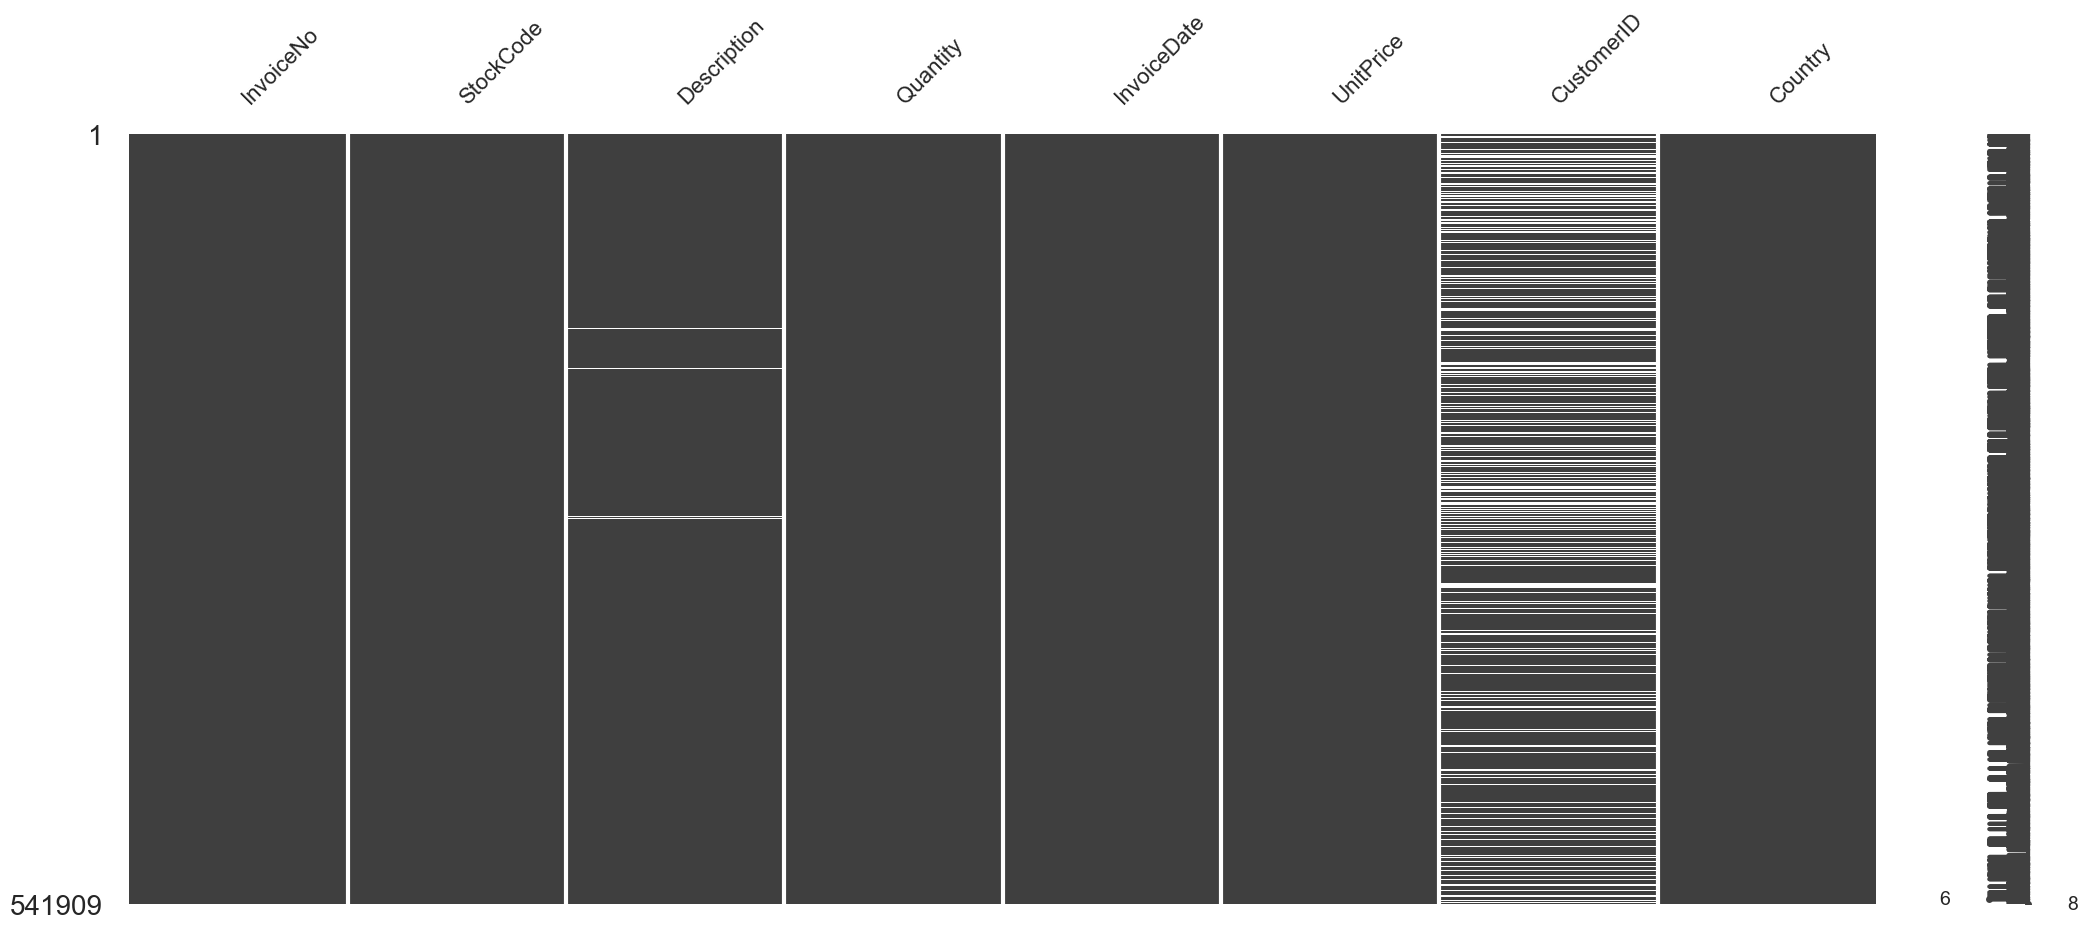

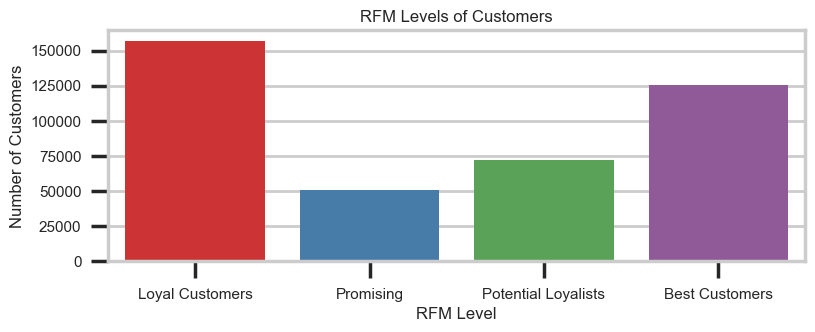

In [69]:
#barplot visualzizing the number of customers per rfm level
plt.figure(figsize=(9,3))
sns.countplot(data = df, x = 'RFM_Level', palette = 'Set1')

plt.xlabel('RFM Level', fontsize = 12)
plt.ylabel('Number of Customers')
plt.title('RFM Levels of Customers')
plt.show()

In [70]:
# Segment customers by RFM_Level: calculate average Recency, Frequency, and MonetaryValue, and count transactions per group.
segmented_customers = df.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
})

In [71]:
segmented_customers

Recency    Frequency MonetaryValue        
                           mean         mean          mean   count
RFM_Level                                                         
Best Customers         4.432232  1815.432773   5244.151497  125627
Loyal Customers       23.216174   223.244631    614.814420  156832
Potential Loyalists   58.865942    87.589062    245.280141   71894
Promising            146.128263    41.723620    115.478936   50568

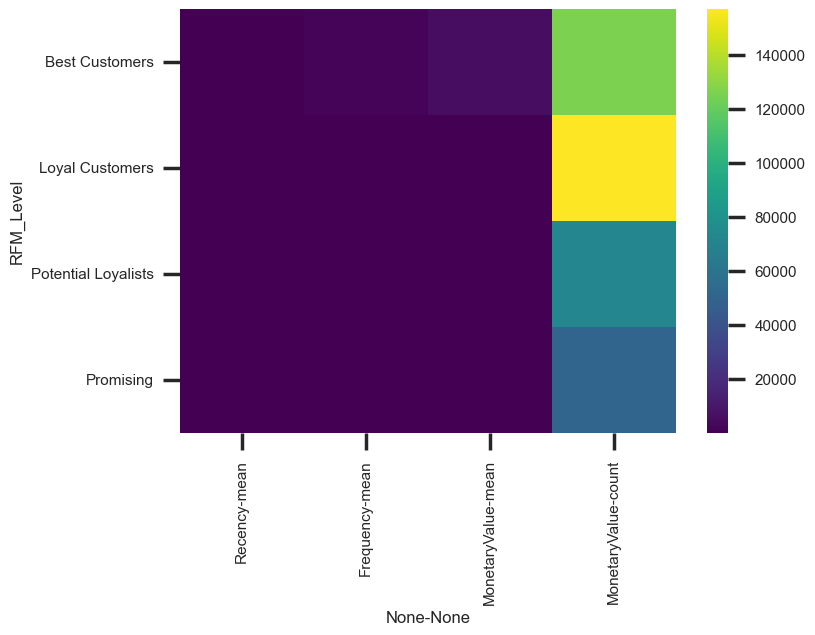

In [72]:
sns.heatmap(segmented_customers, cmap = 'viridis')
plt.show()

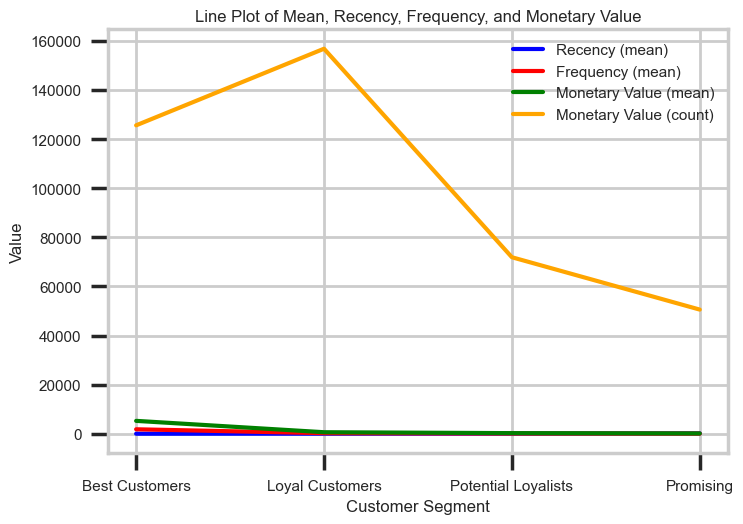

In [73]:
#trying to visualize segmented customers as a line chart

#extracting the columns to plot
recency_mean = segmented_customers.loc[:, ('Recency', 'mean')]
frequency_mean = segmented_customers.loc[:, ('Frequency', 'mean')]
monetary_value_mean = segmented_customers.loc[:, ('MonetaryValue', 'mean')]
monetary_value_count = segmented_customers.loc[:, ('MonetaryValue', 'count')]

#line plits
plt.plot(recency_mean, c = 'blue', label = 'Recency (mean)')
plt.plot(frequency_mean, c = 'red', label = 'Frequency (mean)')
plt.plot(monetary_value_mean, c = 'green', label = 'Monetary Value (mean)')
plt.plot(monetary_value_count, c = 'orange', label = 'Monetary Value (count)')


plt.xlabel('Customer Segment')
plt.ylabel('Value')
plt.title('Line Plot of Mean, Recency, Frequency, and Monetary Value')
plt.legend()
plt.show()

## Clustering products into product categories

In [75]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [76]:
# Tokenize the product descriptions
df['Tokenized_Description'] = df['Description'].apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Tokenized_Description'] = df['Tokenized_Description'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Perform stemming
stemmer = PorterStemmer()
df['Tokenized_Description'] = df['Tokenized_Description'].apply(lambda x: [stemmer.stem(word) for word in x])

# Perform word frequency analysis
df['Word_Counts'] = df['Tokenized_Description'].apply(Counter)

In [77]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency,MonetaryValue,RFM_Score,RFM_Level,Tokenized_Description,Word_Counts
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, hang, heart, t-light, holder]","{'white': 1, 'hang': 1, 'heart': 1, 't-light':..."
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[white, metal, lantern]","{'white': 1, 'metal': 1, 'lantern': 1}"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[cream, cupid, heart, coat, hanger]","{'cream': 1, 'cupid': 1, 'heart': 1, 'coat': 1..."
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[knit, union, flag, hot, water, bottl]","{'knit': 1, 'union': 1, 'flag': 1, 'hot': 1, '..."
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,7,Loyal Customers,"[red, woolli, hotti, white, heart, .]","{'red': 1, 'woolli': 1, 'hotti': 1, 'white': 1..."


In [78]:
# Convert tokenized product descriptions from df into a TF-IDF weighted document-term matrix.
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Tokenized_Description'].apply(' '.join))

### The Elbow Method

The elbow method examines the relationship between the number of clusters, k, and the **within-cluster sum of squared distances (WCSS)**, which quantifies the average distance between each data point and its nearest centroid. As k increases, the **WCSS decreases**, but at a certain point, the reduction in WCSS starts to level off, forming an "elbow" in the plot of WCSS versus k. The idea behind the elbow method is to select the optimal k at the elbow point, where the decrease in WCSS is most significant.

In [ ]:
# Calculate and plot the WCSS for k = 1 to 10 clusters using the Elbow Method to help determine the optimal number of clusters.
wcss = [KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(tfidf_matrix).inertia_ for k in range(1, 11)]
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Convert the TF-IDF matrix to a dense numpy array.
dense_tfidf = tfidf_matrix.toarray()

elbow_method = KElbowVisualizer(KMeans(), k=1)
elbow_method.fit(dense_tfidf)
elbow_method.show()

In [ ]:
#clustering the reduced features
kmeans = KMeans(n_clusters = 3)
kmeans.fit(tfidf_matrix)
retail['Product_Cluster'] = kmeans.predict(tfidf_matrix)

In [ ]:
df.head()

### Visualizing the Product Category Clusters

In [ ]:
# Applies PCA to reduce the TF-IDF features to 2 dimensions and plots a scatter plot of the resulting components, colored by product cluster.
pca_result = PCA(n_components=2).fit_transform(tfidf_matrix.toarray())

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Product_Cluster'], s=5, cmap='viridis')
ax.set_title('Product Clusters', fontsize=14)
ax.set_xlabel('First Principal Component', fontsize=12)
ax.set_ylabel('Second Principal Component', fontsize=12)
plt.colorbar(scatter, ax=ax)
plt.show()


## Customer Segmentation using Unsupervised Learning

## PCA - Dimensional Reduction

In [ ]:
df.info()

In [ ]:
#selecting features
features = ['Quantity', 'UnitPrice', 'Recency', 'Frequency', 'MonetaryValue', 'RFM_Score', 'Product_Cluster']
X = df[features]

In [ ]:
X.shape

In [ ]:
#scaling data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

In [ ]:
#applying PCA
pca = PCA(3, svd_solver = 'full')
pca.fit(df_scaled)
lowdim_df = pca.transform(df_scaled)

In [ ]:
lowdim_df

In [ ]:
#creating a dataframe with PCA output
columns = ['pca_comp_%i' % i for i in range(3)]
df_pca  = pd.DataFrame(lowdim_df, columns = columns)
df_pca.head()

In [ ]:
# #visualizing retail_pca in 3D
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df_pca['pca_comp_0'], df_pca['pca_comp_1'], df_pca['pca_comp_2'], 
           s = 20, c = '#eae2b7', edgecolors = '#d62828')
ax.set_xlabel('PCA Component 0')
ax.set_ylabel('PCA Component 1')
ax.set_zlabel('PCA Component 2')
ax.set_title('PCA Dimensions')
plt.show();

### The Elbow Method for the Customer Segments
Determining the optimal number of clusters (k) for a customer dataset involves evaluating the relationship between k and the within-cluster sum of squared distances (WCSS). The WCSS measures the average squared distance between each customer data point and its closest cluster centroid. As the number of clusters increases, the WCSS decreases; however, after a certain point the rate of decrease sharply diminishes, creating an "elbow" in the WCSS versus k plot. This elbow indicates the optimal k, balancing improved cluster compactness with model complexity.

In [ ]:
#elbow viz for number of k's
elbow_method = KElbowVisualizer(KMeans(), k = 10)
elbow_method.fit(df_pca)
elbow_method.show()